In [1]:
# Main dependencies
import numpy
import numpy as np
import scipy.fftpack

import matplotlib
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')

from kymatio.numpy import Scattering2D
from kymatio.scattering2d import filter_bank

In [2]:
def fftind(size):
    """ Returns a numpy array of shifted Fourier coordinates k_x k_y.
        
        Input args:
            size (integer): The size of the coordinate array to create
        Returns:
            k_ind, numpy array of shape (2, size, size) with:
                k_ind[0,:,:]:  k_x components
                k_ind[1,:,:]:  k_y components
                
        Example:
        
            print(fftind(5))
            
            [[[ 0  1 -3 -2 -1]
            [ 0  1 -3 -2 -1]
            [ 0  1 -3 -2 -1]
            [ 0  1 -3 -2 -1]
            [ 0  1 -3 -2 -1]]
            [[ 0  0  0  0  0]
            [ 1  1  1  1  1]
            [-3 -3 -3 -3 -3]
            [-2 -2 -2 -2 -2]
            [-1 -1 -1 -1 -1]]]
            
        """
    k_ind = numpy.mgrid[:size, :size] - int( (size + 1)/2 )
    k_ind = scipy.fftpack.fftshift(k_ind)
    return( k_ind )



def gaussian_random_field(alpha = 3.0,
                          size = 128, 
                          flag_normalize = True):
    """ Returns a numpy array of shifted Fourier coordinates k_x k_y.
        
        Input args:
            alpha (double, default = 3.0): 
                The power of the power-law momentum distribution
            size (integer, default = 128):
                The size of the square output Gaussian Random Fields
            flag_normalize (boolean, default = True):
                Normalizes the Gaussian Field:
                    - to have an average of 0.0
                    - to have a standard deviation of 1.0
        Returns:
            gfield (numpy array of shape (size, size)):
                The random gaussian random field
                
        Example:
        import matplotlib
        import matplotlib.pyplot as plt
        example = gaussian_random_field()
        plt.imshow(example)
        """
        
        # Defines momentum indices
    k_idx = fftind(size)

        # Defines the amplitude as a power law 1/|k|^(alpha/2)
    amplitude = numpy.power( k_idx[0]**2 + k_idx[1]**2 + 1e-10, -alpha/4.0 )
    amplitude[0,0] = 0
    
        # Draws a complex gaussian random noise with normal
        # (circular) distribution
    noise = numpy.random.normal(size = (size, size)) \
        + 1j * numpy.random.normal(size = (size, size))
    
        # To real space
    gfield = numpy.fft.ifft2(noise * amplitude).real
    
        # Sets the standard deviation to one
    if flag_normalize:
        gfield = gfield - numpy.mean(gfield)
        gfield = gfield/numpy.std(gfield)
        
    return gfield, amplitude

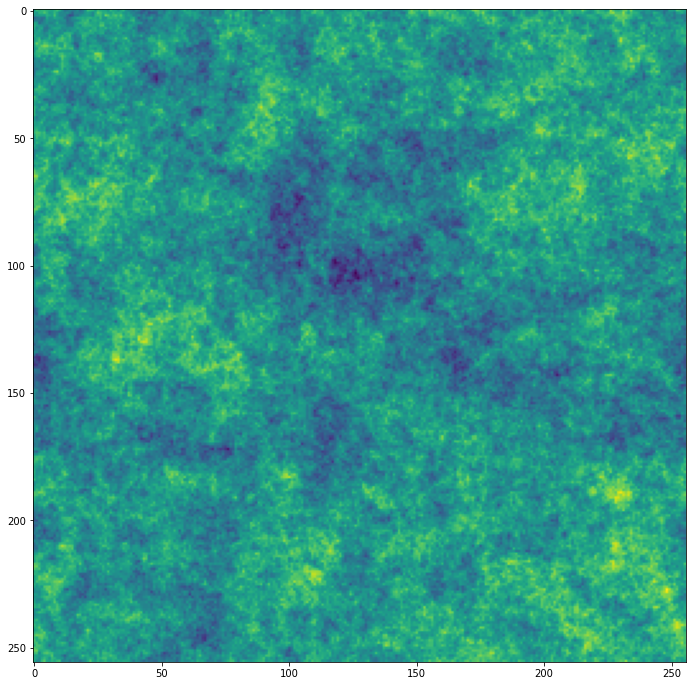

mean:  0.0
std:  1.0


In [6]:
example,amplitude = gaussian_random_field(alpha=2,size=256)
plt.figure(figsize=(12,12))
plt.imshow(example)
plt.show()
print('mean: ', numpy.mean(example))
print('std: ', numpy.std(example))

In [18]:
len(scattering.psi)

16

In [20]:
scattering = Scattering2D(J=2, shape=(256, 256),out_type="list")

In [21]:
scattered=scattering(example)

In [39]:
scattered[27]

{'coef': array([[0.01067647, 0.0116623 , 0.01153107, ..., 0.00873559, 0.00752784,
         0.00598184],
        [0.02032403, 0.01056238, 0.01053866, ..., 0.00899363, 0.00821192,
         0.00715565],
        [0.01924261, 0.01751625, 0.02727531, ..., 0.01235014, 0.01485101,
         0.01341575],
        ...,
        [0.01339327, 0.00962939, 0.00926756, ..., 0.01588312, 0.00746583,
         0.00850587],
        [0.01237571, 0.01867833, 0.01736716, ..., 0.0153944 , 0.00957682,
         0.01211026],
        [0.0163354 , 0.02115863, 0.01447279, ..., 0.01261462, 0.00768345,
         0.00627326]]),
 'j': (0, 1),
 'theta': (1, 2)}

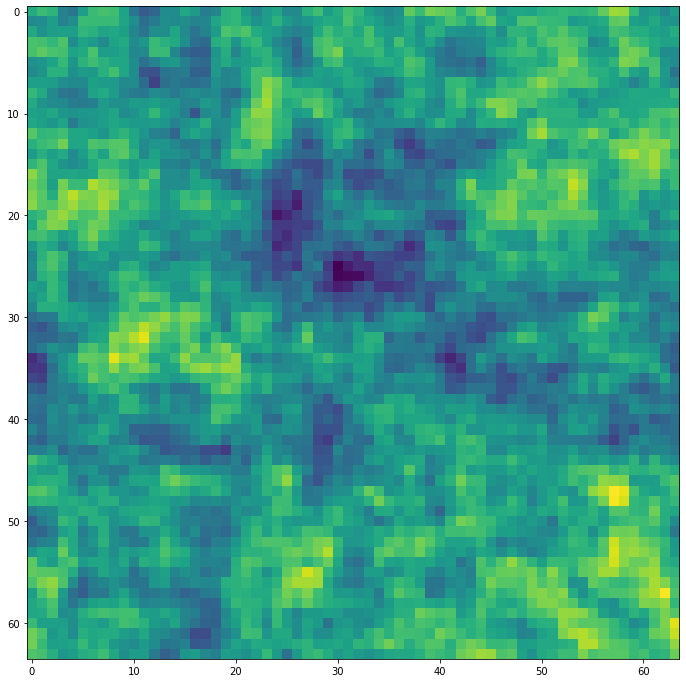

In [17]:
plt.figure(figsize=(12,12))
plt.imshow(scattered[0])
plt.show()

In [ ]:
gabor=filter_bank.gabor_2d(M=256,N=256,sigma=5,theta=0.2,xi=15)

In [ ]:
gabor.shape

In [ ]:
plt.figure(figsize=(12,12))
plt.imshow(np.log(abs(gabor)))
plt.colorbar()

In [ ]:
gabor